# Covariância e correlação

São maneiras de medir se dois atributos diferentes tem relação em um conjunto de dados.


## Covariância

- Mede o quanto duas variáveis variam em relação as suas médias

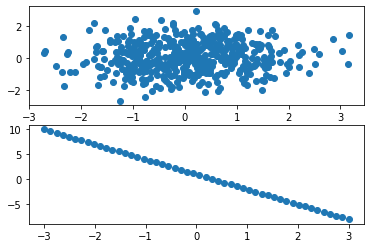

In [0]:
import matplotlib.pyplot as plt
from pylab import randn
import numpy as np
plt.subplot(211)
X = randn(500)
Y = randn(500)
plt.scatter(X,Y)
plt.subplot(212)
x2 = np.linspace(-3,3)
y2 = -3*x2+1
plt.scatter(x2,y2)
plt.show()

## Como medir a covariância?

- Pense no conjunto de dados de cada uma das variáveis como um vetor n-dimensional

- Converta estes para vetores de variâncias da média

- Faça o produto escalar (cosseno do ângulo) entre os vetores

- Divida pelo tamanho da amostra

Difícil? 

Nunca teremos de computar a covariância desse jeito, pois o python nos dá uma maneira de calcular facilmente.

## Como interpretar a covariância?

Sabemos que uma covariância pequena, perto de 0, indica que não já muita correlação entre as variáveis. Porém, uma covariância alta, ou seja, distante de zero tanto positiva quanto negativamente pode indicar uma correlação.

Mas o quão grande tem que ser a covariância?



# É aí que usamos a correlação

Basta dividirmos a covariância pelo desvio padrão de ambas as variáveis e normalizaremos as coisas

- Uma correlação de -1 siginifica uma correlação inversa perfeita
- Uma correlação de 0 siginifica nenhuma correlação
- Uma correlação de 1 significa correlação perfeita


# Correlação não quer dizer causalidade!

- Apenas um experimento controlado e randomizado pode nos dar insights sobre a causalidade

- Podemos usar a correlação para decidir que experimentos iremos fazer


Correlações espúrias

https://www.tylervigen.com/spurious-correlations


# Vamos para a prática!

-0.4718115417011827

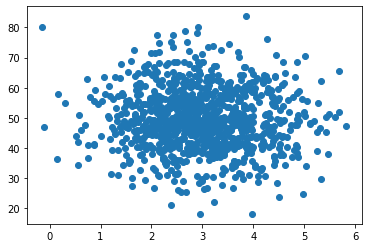

In [0]:
import numpy as np
from pylab import *

def desvio_media(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariancia(x, y):
    n = len(x)
    return dot(desvio_media(x), desvio_media(y)) / (n-1)

idade = np.random.normal(3.0, 1.0, 1000)
riqueza = np.random.normal(50.0, 10.0, 1000)

scatter(idade, riqueza)

covariancia (idade, riqueza)

Agora faremos com que riqueza seja uma função da idade, provocando então uma correlação entre os dois. O valor negativo indica que há uma correlação inversa, ou seja, quanto mais velho se tem uma tendência de ficar mais pobre.

-6.500379446402562

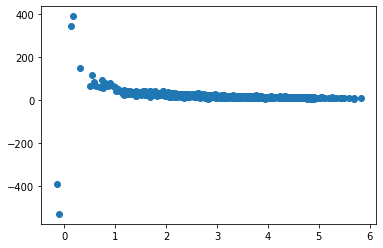

In [0]:
riqueza = np.random.normal(50.0, 10.0, 1000) / idade
scatter(idade, riqueza)

covariancia (idade, riqueza)

Mas o que esse valor signifca? A covariância é sensível às unidades que usamos nas variáveis, o que torna difícil de interpretar. A correlação normaliza tudo pelos seus desvios padrões, dando valores mais fáceis de entender. 

In [0]:
def correlacao(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariancia(x,y) / stddevx / stddevy 

correlacao(idade, riqueza)

-0.23059818731431

O numpy pode fazer isto para nós com numpy.corrcoef. Ele retorna uma matriz com os coeficientes de correlalão entre cada combinação dos arrays passados:

In [0]:
np.corrcoef(idade, riqueza)

array([[ 1.        , -0.23036759],
       [-0.23036759,  1.        ]])

Não é perfeitamente igual ao calculado na mão por problemas de precisão do computador.

Podemos forçar uma correlação perfeita fabricando uma relação linear

array([[ 1., -1.],
       [-1.,  1.]])

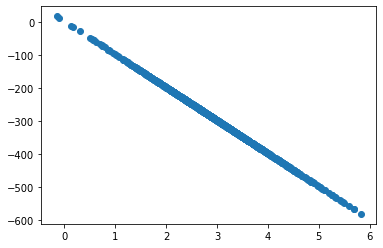

In [0]:
riqueza = -100*idade + 3
scatter(idade, riqueza)

correlacao (idade, riqueza)

np.corrcoef(idade, riqueza)


Lembremos que correlação não implica causalidade!

# Atividade

O numpy também tem uma função de covariância (numpy.cov). Tente usá-la para os dados de idade e riqueza, interprete os resultados e compare-os com o resultado da função que criamos.